# Score-based Learner

Causal discovery attracts more and more attention recently to infer causal structure from data and disentangles the complex relationship among variables. In the following, we detail a state-of-the-art causal discovery learner, NOTEARS (Zheng et al., 2018), as a score-based learner.

***Application situations***: 
    
1. Moderate or high-dimensional nodes;
2. Unknown causal model or noises.

***Advantage of the learner***:

1. Handle general causal graph with general noises;
2. Graph can be uniquely identified in various cases;
3. Computational fast in high-dimensional setting.
    
***Disadvantage of the learner***:

1. Results is not invariant to data trasformation. 

## Overview:

### 1. Causal Graph Terminology and Goal

Consider a graph $\mathcal{G} =(\mathbf{Z},\mathbf{E})$ with a node set $\mathbf{Z}$ and an edge set $\mathbf{E}$. A node $Z_i$ is said to be a parent of $Z_j$ if there is a directed edge from $Z_i$ to $Z_j$. Let the set of all parents of node $Z_j$ in $\mathcal{G}$ as $PA_{Z_j} (\mathcal{G})$. A directed graph that does not contain directed cycles is called a directed acyclic graph (DAG). Suppose a DAG $\mathcal{G}=(\mathbf{Z},\mathbf{E})$ that characterizes the causal relationship among $|\mathbf{Z}|=d$ nodes, where $\mathbf{Z}=[Z_1,Z_2,\cdots,Z_d]^\top $ represents a random vector and an edge $Z_i\rightarrow Z_j$ means that $Z_i$ is a direct cause of $Z_j$.  Given realizations of the variable set $\mathbf{Z}$ as $\{z_1^{(i)},z_2^{(i)},\cdots,z_d^{(i)}\}_{1\leq i \leq n}$, we aim to estimate the underlying causal graph $\mathcal{G}$.

### 2. Applicable Causal Graphical Models 
Most causal graph learners rely on structural equation model (SEM).


#### Model 1: Linear Structural Equation Model (LSEM)

Let $B=\{b_{i,j}\}_{1\leq i\leq d,1\leq j\leq d}$ be a $d\times d$ matrix, where $b_{i,j}$ is the weight of the edge $Z_i\rightarrow Z_j \in \mathbf{E}$, and $b_{i,j}=0$ otherwise. Then, we say that $\mathcal{G} =(\mathbf{Z},B)$ is a weighted DAG with the node set $\mathbf{Z}$ and the weighted adjacency matrix $B$ (the edge set $\mathbf{E}$ is nested in $B$). Under no unmeasured confounders, the Markov condition, the faithfulness condition, causal sufficiency assumption, and the linear structural equation model (LSEM) such that $\mathbf{Z}$ characterized by the pair ($\mathcal{G}$, $\epsilon$) is generated by 
\begin{equation}\label{lsem_x}
\mathbf{Z}=B^\top \mathbf{Z} +\epsilon,
\end{equation}
where $\epsilon $ is a  random vector of jointly independent error variables. The LSEM model has good interpretation and has been analysised by Zheng et al. (2018) by contrained optimization. When the noise is Gaussian with equal variance, the model is identifiable (Peters and Bühlmann, 2013). In addition, under the linear model with non-Gaussian noise, the model is also identifiable (Shimizu et al., 2006).

#### Model 2: Generalized LSEM 

To handle complex relationship, a generalized version of LSEM has been studied by Yu et al. (2019) as
\begin{equation} 
f_2(\mathbf{Z})=B^\top f_2(\mathbf{Z}) +f_1(\epsilon),
\end{equation}
where the parameterized functions $f_1$ and $f_2$ effectively perform (possibly nonlinear) transforms on $\epsilon$ and $\mathbf{Z}$, respectively.  Here, Model 1 is a special case of Model 2. 

#### Model 3: Additive Noise Model

Suppose there exists a weighted DAG $\mathcal{G}=(\mathbf{Z},\mathbf{E})$ that characterizes the causal relationship among $|\mathbf{Z}|=d$ nodes. Each variable $Z_i$ is associated with a node $i$ in the DAG $\mathcal{G}$, and the observed value of $Z_i$ is obtained as a function of its parents in the graph plus an independent additive noise $n_i$, i.e., 
\begin{equation}\label{anm}
Z_i := f_i\{PA_{Z_i} (\mathcal{G})\} + n_i,i = 1,2,...,d, 
\end{equation}
where $PA_{Z_i} (\mathcal{G})$ denotes the set of parent variables of $Z_i$ so that there is an edge from $Z_j\in PA_{Z_i} (\mathcal{G})$ to $Z_i$ in the graph, and the noises $n_i$ are assumed to be jointly independent. Assuming the $g_j$ are three times differentiable and not linear in any of its arguments, this model is identifiable (Peters et al., 2014, Corollary 31). Here, Model 1 is a special case of Model 3 as well.


### 3. Algorithm Details

The NOTEARS learner (Zheng et al., 2018) estimates the weighted adjacency matrix by formulating the optimization with an acyclicity constraint. The implementation is available at their repository at https://github.com/xunzheng/notears. A follow-up work using a VAE parameterized by a graph neural network that generalizes LSEM was proposed in Yu et al. (2019) with a more computational friendly constraint, namely DAG-GNN. Also see Zhu & Chen (2019) and Cai et al. (2021) for other cutting-edge structural learning methods. 

 

## Demo Code

## Generate Synthetic Datasets

In [1]:
import os
import numpy as np
from utils import *
from synthetic_datasets import *
seed = 1234
np.random.seed(seed)
d = 8
n = 300
ground_truth_G = simulate_random_dag(d=d, degree=2, graph_type='erdos-renyi', w_range = (1.0, 1.0))
c = np.zeros(d)
s = np.ones([d])
df = simulate_lsem(G = ground_truth_G, A_type ='Gaussian', n = n, baseline=0).reshape((n,d))

#plot true causal graph:
plot_net(nx.to_numpy_array(ground_truth_G), labels_name=list(range(d))) 

ModuleNotFoundError: No module named 'synthetic_datasets'

### Causal Discovery by  NOTEARS Learner (Zheng et al., 2018)


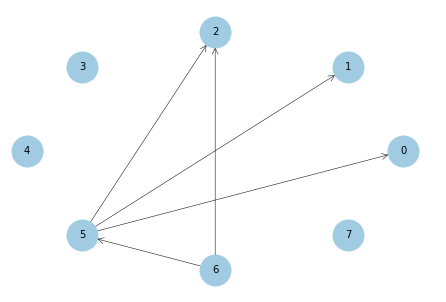

FDR: 0.0
TPR: 0.62
SHD: 3


In [2]:
from utils import *
from notears import *
graph = notears_linear(df.reshape(len(df),d), lambda1=0.1, loss_type='l2')
notears_res = np.matrix(graph)
notears_res[np.abs(notears_res) < 0.3] = 0 
#plot the estimated causal graph:
plot_net(notears_res, labels_name=list(range(d))) 

FDR, TPR, SHD = count_accuracy(nx.DiGraph(ground_truth_G), nx.DiGraph(notears_res))
print('FDR:', np.round(FDR, 2)) 
print('TPR:', np.round(TPR, 2)) 
print('SHD:', np.round(SHD, 2)) 

#### Summary of Results under Different Causal Graph Learners.

Note: The estimated graphs (after pruning) are evaluated by three metrics: the false discovery rate (FDR), the true positive rate (TPR), and the structural Hamming distance (SHD, the smallest number of edge additions, deletions, and reversals to convert the estimated graph into the true DAG). Here, the SHD takes into account both false positives and negatives and a lower SHD indicates a better estimate of the causal graph.

| Learners |   FDR   |   TPR   |   SHD   |
|----------|---------|---------|---------|
|    PC    |   0.00  |   0.50  |   4     |
|ICA-LiNGAM|   0.67  |   0.25  |   7     |
| NOTEARS  |   0.00  |   0.62  |   3     |
|  DAGGNN  |   0.00  |   0.62  |   3     |

## References

[1] Judea Pearl et al. Causal inference in statistics: An overview. Statistics surveys, 3:96–146, 2009.

[2] Pater Spirtes, Clark Glymour, Richard Scheines, Stuart Kauffman, Valerio Aimale, and Frank Wimberly. Constructing bayesian network models of gene expression networks from microarray data. 2000.

[3] Markus Kalisch and Peter Bühlmann. Estimating high-dimensional directed acyclic graphs with the pc-algorithm. Journal of Machine Learning Research, 8(Mar):613–636, 2007.

[4] Rajen D Shah and Jonas Peters. The hardness of conditional independence testing and the generalised covariance measure. arXiv preprint arXiv:1804.07203, 2018.

[5] Shohei Shimizu, Patrik O Hoyer, Aapo Hyvärinen, and Antti Kerminen. A linear non-gaussian acyclic model for causal discovery. Journal of Machine Learning Research, 7(Oct):2003–2030, 2006.

[6] Peter Bühlmann, Jonas Peters, Jan Ernest, et al. Cam: Causal additive models, high-dimensional order search and penalized regression. The Annals of Statistics, 42(6):2526–2556, 2014.

[7] David Maxwell Chickering. Optimal structure identification with greedy search. Journal of machine learning research, 3(Nov):507–554, 2002.

[8] Joseph Ramsey, Madelyn Glymour, Ruben Sanchez-Romero, and Clark Glymour. A million variables and more: the fast greedy equivalence search algorithm for learning high-dimensional graphical causal models, with an application to functional magnetic resonance images. International journal of data science and analytics, 3(2):121–129, 2017.

[9] Xun Zheng, Bryon Aragam, Pradeep K Ravikumar, and Eric P Xing. Dags with no tears: Continuous optimization for structure learning. In Advances in Neural Information Processing Systems, pp. 9472–9483, 2018.

[10] Yue Yu, Jie Chen, Tian Gao, and Mo Yu. Dag-gnn: Dag structure learning with graph neural networks.
arXiv preprint arXiv:1904.10098, 2019.

[11] Shengyu Zhu and Zhitang Chen. Causal discovery with reinforcement learning. arXiv preprint arXiv:1906.04477, 2019.

[12] Cai, Hengrui, Rui Song, and Wenbin Lu. "ANOCE: Analysis of Causal Effects with Multiple Mediators via Constrained Structural Learning." International Conference on Learning Representations. 2020.

[13] J. Peters and P. Bühlmann. Identifiability of Gaussian structural equation models with equal error variances.
Biometrika, 101(1):219–228, 2013.

[14] J. Peters, J. Mooij, D. Janzing, and B. Schölkopf. Causal Discovery with Continuous Additive Noise Models.
Journal of Machine Learning Research, 2014.